<a href="https://colab.research.google.com/github/MITStud201911/MyFirtsRepro/blob/master/hw2_lending_club_hw_trees_starteripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

In [3]:
lc_data.dropna(axis=1, inplace=True) # Dropping NANs

In [4]:
lc_data.head()

Unnamed: 0        id  ...  total_il_high_credit_limit  debt_settlement_flag
0       65230  92451797  ...                     11614.0                     N
1       36521  94187830  ...                     30983.0                     N
2       25712  93882482  ...                     38489.0                     N
3       92973  91238602  ...                     27002.0                     N
4       16335  94465406  ...                     50522.0                     N

[5 rows x 90 columns]

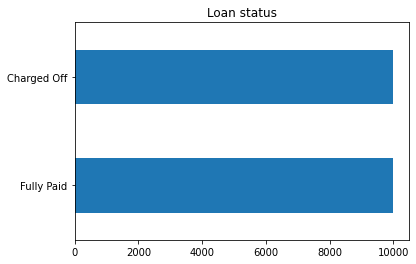

In [5]:
lc_data.loan_status.value_counts().plot(kind='barh', title='Loan status')
plt.show() 

In [6]:
lc_data.loan_status = lc_data.loan_status.replace({'Charged Off':1, 'Fully Paid':0})
y = lc_data.pop('loan_status')

In [7]:
categorical_cols = [
  'term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan']
categorical_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan']

In [8]:
numerical_columns = [
  'loan_amnt',
  'installment',
  'delinq_2yrs',
  'fico_range_low',
  'fico_range_high',
  'total_acc'
]
numerical_columns

['loan_amnt',
 'installment',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'total_acc']

In [9]:
lc_data_subset = lc_data[numerical_columns + categorical_cols]
lc_data_subset.head()

loan_amnt  installment  delinq_2yrs  ...  verification_status   issue_d  pymnt_plan
0    26450.0       685.99          2.0  ...         Not Verified  Nov-2016           n
1    12000.0       395.37          0.0  ...      Source Verified  Nov-2016           n
2     1000.0        35.16          0.0  ...      Source Verified  Dec-2016           n
3    10000.0       327.34          0.0  ...             Verified  Oct-2016           n
4     4500.0       181.89          0.0  ...             Verified  Dec-2016           n

[5 rows x 13 columns]

In [10]:
# Create dummy variables
lc_data_subset = pd.get_dummies(data = lc_data_subset, columns=categorical_cols, drop_first=False)
lc_data_subset

loan_amnt  installment  ...  issue_d_Oct-2016  pymnt_plan_n
0        26450.0       685.99  ...                 0             1
1        12000.0       395.37  ...                 0             1
2         1000.0        35.16  ...                 0             1
3        10000.0       327.34  ...                 1             1
4         4500.0       181.89  ...                 0             1
...          ...          ...  ...               ...           ...
19995    12000.0       369.95  ...                 1             1
19996     7300.0       256.62  ...                 1             1
19997    12600.0       344.36  ...                 0             1
19998    16000.0       380.56  ...                 1             1
19999    10400.0       252.86  ...                 0             1

[20000 rows x 61 columns]

In [11]:
X = lc_data_subset

# Splitting data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [13]:
X_train.head()

loan_amnt  installment  ...  issue_d_Oct-2016  pymnt_plan_n
4306      4000.0       131.89  ...                 0             1
19904    35000.0      1247.68  ...                 1             1
19201    19600.0       443.36  ...                 0             1
3759     21000.0       650.73  ...                 0             1
13244    20000.0       626.64  ...                 0             1

[5 rows x 61 columns]

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.185053 to fit



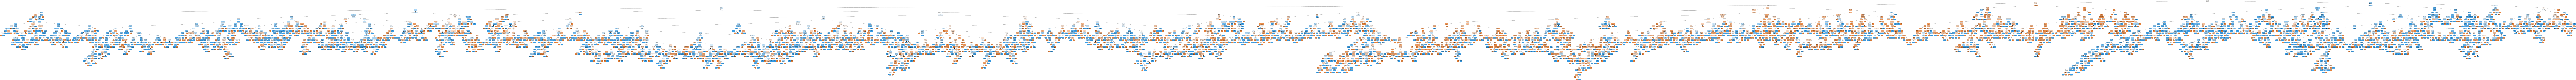

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Paid', 'Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
pred_dt_binary = dt_model.predict(X_valid)
print("Classification Report")
print(classification_report(y_valid, pred_dt_binary))
print('\n')
print("Confusion Matrix")
print(confusion_matrix(y_valid, pred_dt_binary))

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1817
           1       0.58      0.57      0.57      1933

    accuracy                           0.57      3750
   macro avg       0.57      0.57      0.57      3750
weighted avg       0.57      0.57      0.57      3750



Confusion Matrix
[[1021  796]
 [ 833 1100]]


# Evaluating model

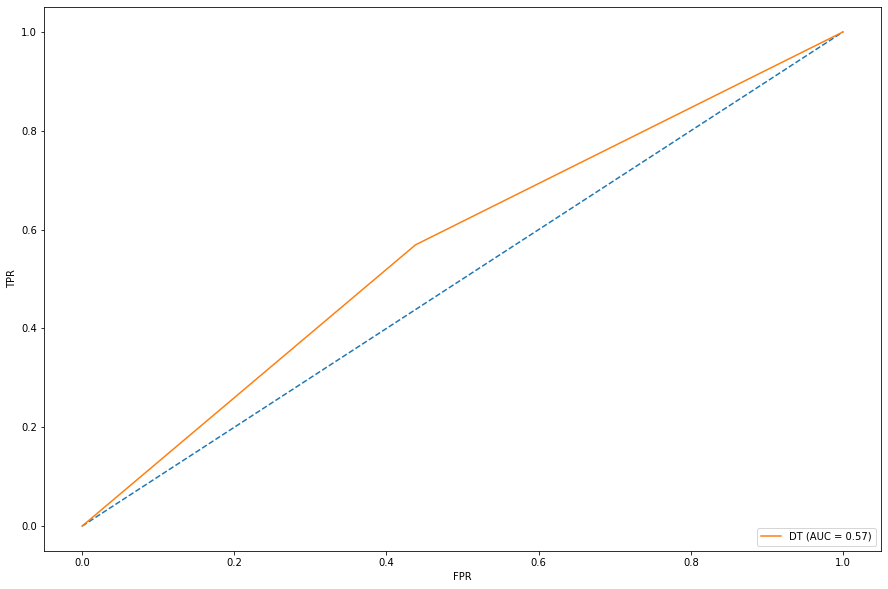

In [22]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

**Random Forest**

In [25]:
# Import Random Forest Library
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
pred_dt_binary = rfc.predict(X_valid)
print("Classification Report")
print(classification_report(y_valid,pred_dt_binary))
print('\n')
print("Confusion Matrix")
print(confusion_matrix(y_valid,pred_dt_binary))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1817
           1       0.64      0.62      0.63      1933

    accuracy                           0.62      3750
   macro avg       0.62      0.62      0.62      3750
weighted avg       0.62      0.62      0.62      3750



Confusion Matrix
[[1136  681]
 [ 733 1200]]


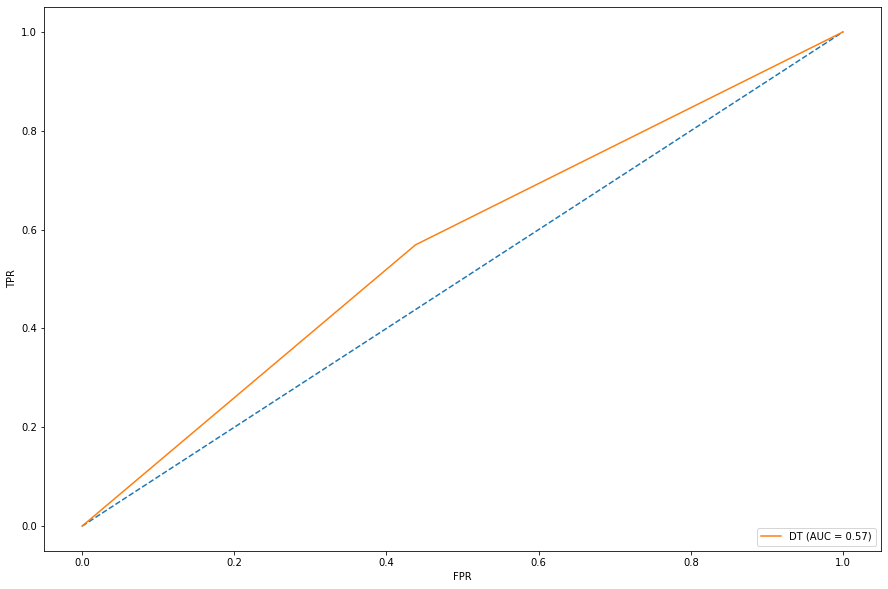

In [24]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()